In [1]:
!pip install qiskit qiskit_aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=df326900e8540f700e32014897d24b57abde9739d7d4df0063e20ee94ed5990e
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [4]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [5]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

In [6]:
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      


In [7]:
def qft_dagger_rotations(qc, n):
    """Apply inverse QFT rotations (QFT dagger) recursively."""
    if n == 0:
        return qc
    n -= 1
    # Note: the loop is reversed for inverse rotations
    for qubit in reversed(range(n)):
        qc.cp(-np.pi / 2**(n - qubit), qubit, n)
    qc.h(n)
    qft_dagger_rotations(qc, n)
    return qc

In [8]:
def iqft_circuit(n):
    """Builds an n-qubit Inverse Quantum Fourier Transform (IQFT) circuit."""
    qc = QuantumCircuit(n)
    swap_registers(qc, n)
    qft_dagger_rotations(qc, n)
    qc.name = "IQFT"
    return qc

# ***TASK 1***

In [9]:
def task1_vary_qubits(qubit_list):
    """
    Builds and prints the QFT circuit for a list of qubit counts.
    """
    print("## 1. Varying the Number of Qubits")
    for n_qubits_t1 in qubit_list:
        qc_t1 = qft_circuit(n_qubits_t1)
        print(f"\n--- QFT Circuit for {n_qubits_t1} Qubits ---")
        print(qc_t1.draw(output='text', fold=-1))
    print("-" * 50)

task1_vary_qubits([2, 3, 4])

## 1. Varying the Number of Qubits

--- QFT Circuit for 2 Qubits ---
                   ┌───┐   
q_0: ──────■───────┤ H ├─X─
     ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ H ├─■─────────────X─
     └───┘                 

--- QFT Circuit for 3 Qubits ---
                                          ┌───┐   
q_0: ──────■──────────────────────■───────┤ H ├─X─
           │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘                                        

--- QFT Circuit for 4 Qubits ---
                                                                          ┌───┐   
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├─X─
           │                               │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X───┼─
           │        │             

# ***TASK 2***

In [10]:
def task2_inverse_qft(n_qubits_t2):
    """
    Applies QFT to a state, then applies IQFT to recover the original state.
    """
    print("\n## 2. Inverse QFT (IQFT) Demonstration")

    # 1. Prepare an initial state (e.g., |100> for n=3)
    qc_t2 = QuantumCircuit(n_qubits_t2)
    qc_t2.x(0)
    qc_t2.barrier()

    # 2. Apply QFT
    qc_t2.append(qft_circuit(n_qubits_t2), range(n_qubits_t2))
    qc_t2.barrier()

    # 3. Apply Inverse QFT (IQFT)
    qc_t2.append(iqft_circuit(n_qubits_t2), range(n_qubits_t2))

    # Run the circuit and display statevector
    simulator_t2 = AerSimulator(method='statevector')
    qc_t2.save_statevector()
    compiled_t2 = transpile(qc_t2, simulator_t2)
    result_t2 = simulator_t2.run(compiled_t2).result()
    statevector_t2 = result_t2.data(0)["statevector"]

    print(f"Running QFT followed by IQFT on an input state |10...0> ({n_qubits_t2} qubits).")
    print("Expected final state: |10...0>")
    # Check the amplitude of the |100> state (index 1)
    print(f"Actual statevector for |10...0> (index 1): {statevector_t2[1]}")
    print("\nFull Circuit Diagram (QFT followed by IQFT):")
    print(qc_t2.draw(output='text', fold=-1))
    print("-" * 50)

task2_inverse_qft(n_qubits_t2=3)


## 2. Inverse QFT (IQFT) Demonstration
Running QFT followed by IQFT on an input state |10...0> (3 qubits).
Expected final state: |10...0>
Actual statevector for |10...0> (index 1): (0.676776695296637+0.17677669529663662j)

Full Circuit Diagram (QFT followed by IQFT):
     ┌───┐ ░ ┌──────┐ ░ ┌───────┐ statevector 
q_0: ┤ X ├─░─┤0     ├─░─┤0      ├──────░──────
     └───┘ ░ │      │ ░ │       │      ░      
q_1: ──────░─┤1 QFT ├─░─┤1 IQFT ├──────░──────
           ░ │      │ ░ │       │      ░      
q_2: ──────░─┤2     ├─░─┤2      ├──────░──────
           ░ └──────┘ ░ └───────┘      ░      
--------------------------------------------------


# ***TASK 3***


## 3. Quantum Phase Estimation (QPE) Integration
QPE with 4 counting qubits. Target phase for T-gate on |1>: θ = 0.125 (1/8).
Most frequent measurement: |0010>
Estimated phase (theta): 0.125

QPE Circuit Diagram (IQFT is a sub-routine):
     ┌───┐                                                                                                                                        ░ ┌───────┐┌─┐         
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤0      ├┤M├─────────
     ├───┤ │                                                                                                                                      ░ │       │└╥┘┌─┐      
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤1      ├─╫─┤M├──────
     ├───┤ │        │        │                                                    

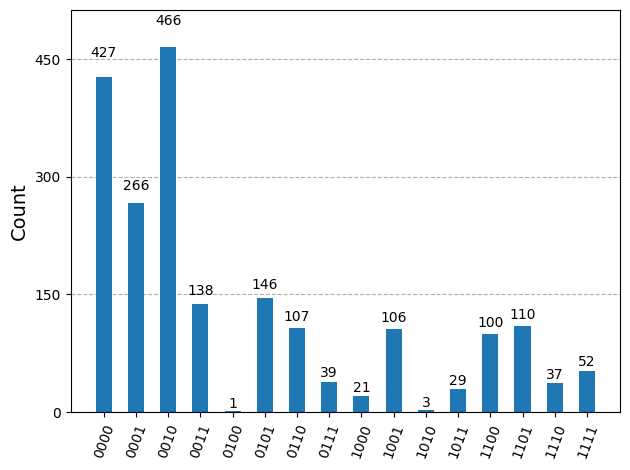

--------------------------------------------------


In [11]:
def task3_phase_estimation(n_count_t3):
    """
    Implements a simple Quantum Phase Estimation circuit.
    Estimates the phase 'theta' of a T gate (U|1> = e^(i*pi/4)|1>).
    Phase is pi/4, so theta = 1/8 = 0.125
    """
    print("\n## 3. Quantum Phase Estimation (QPE) Integration")

    # QPE circuit (counting qubits + target qubit)
    n_total_t3 = n_count_t3 + 1
    qc_t3 = QuantumCircuit(n_total_t3, n_count_t3)

    # 1. Prepare state (eigenvector |1> in the last qubit)
    qc_t3.x(n_count_t3) # Target qubit is the last one

    # 2. Apply Hadamard on counting qubits
    qc_t3.h(range(n_count_t3))

    # 3. Controlled-U operations (Controlled-T^2^k)
    repetitions_t3 = 1
    for counting_qubit_t3 in range(n_count_t3):
        # We want to apply the T gate 'repetitions_t3' times,
        # controlled by the 'counting_qubit_t3'.
        # The T gate has a phase of pi/4.
        # We use the controlled-phase (CP) gate.
        # cp(angle, ctl, tgt)
        for _ in range(repetitions_t3):
            qc_t3.cp(np.pi/4, counting_qubit_t3, n_count_t3)
        repetitions_t3 *= 2
    qc_t3.barrier()

    # 4. Inverse QFT (IQFT) on counting qubits
    qc_t3.append(iqft_circuit(n_count_t3), range(n_count_t3))

    # 5. Measure the counting qubits
    qc_t3.measure(range(n_count_t3), range(n_count_t3))

    # Execute simulation
    simulator_t3 = AerSimulator()
    compiled_t3 = transpile(qc_t3, simulator_t3)
    shots_t3 = 2048
    result_t3 = simulator_t3.run(compiled_t3, shots=shots_t3).result()
    counts_t3 = result_t3.get_counts()

    # Calculate estimated phase
    most_common_state_t3 = max(counts_t3, key=counts_t3.get)
    estimated_phase_t3 = int(most_common_state_t3, 2) / (2**n_count_t3)

    print(f"QPE with {n_count_t3} counting qubits. Target phase for T-gate on |1>: θ = 0.125 (1/8).")
    print(f"Most frequent measurement: |{most_common_state_t3}>")
    print(f"Estimated phase (theta): {estimated_phase_t3}")
    print("\nQPE Circuit Diagram (IQFT is a sub-routine):")
    print(qc_t3.draw(output='text', fold=-1))

    # Plot results
    display(plot_histogram(counts_t3))
    plt.show()
    print("-" * 50)

task3_phase_estimation(n_count_t3=4)

# ***TASK 4***


## 4. Measuring QFT Output States
Running QFT on initial state |10...0> (3 qubits).
For |100>, QFT results in an equal superposition, so we expect a flat histogram.


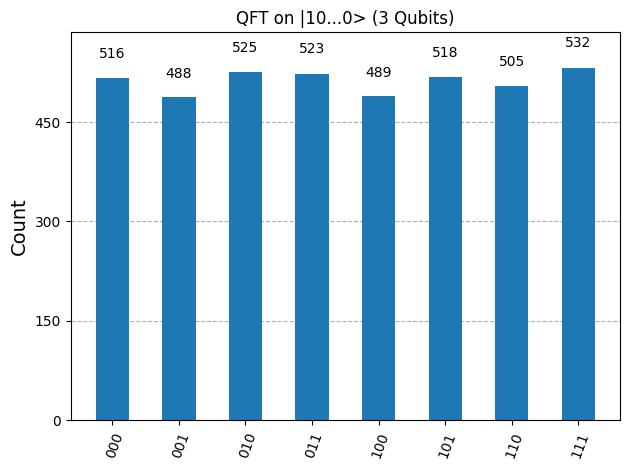

--------------------------------------------------


In [12]:
def task4_measure_output(n_qubits_t4):
    """
    Applies QFT to an initial state, measures the output, and plots the histogram.
    """
    print("\n## 4. Measuring QFT Output States")

    # Initial state: |1> in the first qubit, |0> in the rest (e.g., |100> for n=3)
    qc_t4 = QuantumCircuit(n_qubits_t4, n_qubits_t4)
    qc_t4.x(0)
    qc_t4.barrier()

    # Apply QFT
    qc_t4.append(qft_circuit(n_qubits_t4), range(n_qubits_t4))

    # Add measurements
    qc_t4.barrier()
    qc_t4.measure(range(n_qubits_t4), range(n_qubits_t4))

    # Execute simulation
    simulator_t4 = AerSimulator()
    compiled_t4 = transpile(qc_t4, simulator_t4)
    shots_t4 = 4096
    result_t4 = simulator_t4.run(compiled_t4, shots=shots_t4).result()
    counts_t4 = result_t4.get_counts()

    print(f"Running QFT on initial state |10...0> ({n_qubits_t4} qubits).")
    print("For |100>, QFT results in an equal superposition, so we expect a flat histogram.")

    # Plot results
    display(plot_histogram(counts_t4, title=f'QFT on |10...0> ({n_qubits_t4} Qubits)'))
    plt.show()
    print("-" * 50)

task4_measure_output(n_qubits_t4=3)

# ***TASK 5***


## 5. Circuit Visualization (qc.draw('mpl'))
Displaying QFT circuit for 4 qubits using 'mpl' backend...


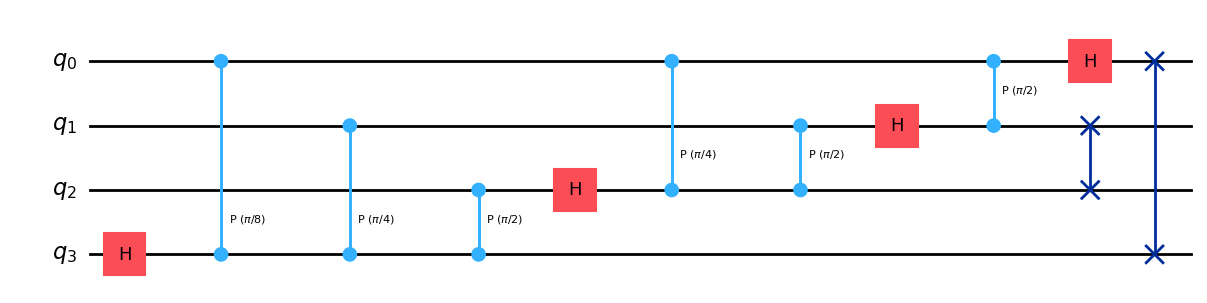

--------------------------------------------------


In [13]:
def task5_circuit_visualization(n_qubits_t5):
    """
    Generates and displays the circuit diagram using qc.draw('mpl').
    """
    print("\n## 5. Circuit Visualization (qc.draw('mpl'))")

    qc_t5 = qft_circuit(n_qubits_t5)

    print(f"Displaying QFT circuit for {n_qubits_t5} qubits using 'mpl' backend...")

    display(qc_t5.draw('mpl'))
    plt.show()
    print("-" * 50)

task5_circuit_visualization(n_qubits_t5=4)